<a href="https://colab.research.google.com/github/Aditya-shivale121/Week_1_Traffic_Sign_Detection/blob/main/Traffic_Sign_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os

if 'COLAB_GPU' in os.environ:
    print(os.environ['COLAB_GPU'])
else:
    print("GPU is not enabled!")


1


In [6]:
import os
os.chdir("/content")  # resets to a valid directory


In [7]:
pip install ultralytics==8.3.32


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.0/887.0 kB 20.1 MB/s eta 0:00:00


In [8]:
import ultralytics

ultralytics.checks()

Ultralytics 8.3.32 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.3/112.6 GB disk)


In [9]:
%pwd

'/content'

In [10]:
mkdir TrafficSignDetection

In [11]:
!ls

TrafficSignDetection


In [12]:
path = "/content/TrafficSignDetection"

In [13]:
%pwd

'/content'

In [14]:
%cd /content/TrafficSignDetection
%pwd

/content/TrafficSignDetection


'/content/TrafficSignDetection'

In [15]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="oH6CCUOSyF0uuLFJ4Rtj")
project = rf.workspace("selfdriving-car-qtywx").project("self-driving-cars-lfjou")
version = project.version(6)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 138.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Self-Driving-Cars-6 in yolov8:: 100%|██████████| 9950/9950 [00:00<00:00, 10170.09it/s]


In [1]:
%cd /content/TrafficSignDetection/Self-Driving-Cars-6

/content/TrafficSignDetection/Self-Driving-Cars-6


In [2]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/TrafficSignDetection/Self-Driving-Cars-6/data.yaml epochs=10 imgsz=640 batch=16

100% 6.25M/6.25M [00:00<00:00, 119MB/s]
New https://pypi.org/project/ultralytics/8.3.226 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.32 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/TrafficSignDetection/Self-Driving-Cars-6/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=Fal

In [3]:
!ls '/content/TrafficSignDetection/Self-Driving-Cars-6/runs/detect/train'

args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1762704602.0bd74f19165d.3114.0  train_batch2.jpg
F1_curve.png					    val_batch0_labels.jpg
labels_correlogram.jpg				    val_batch0_pred.jpg
labels.jpg					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


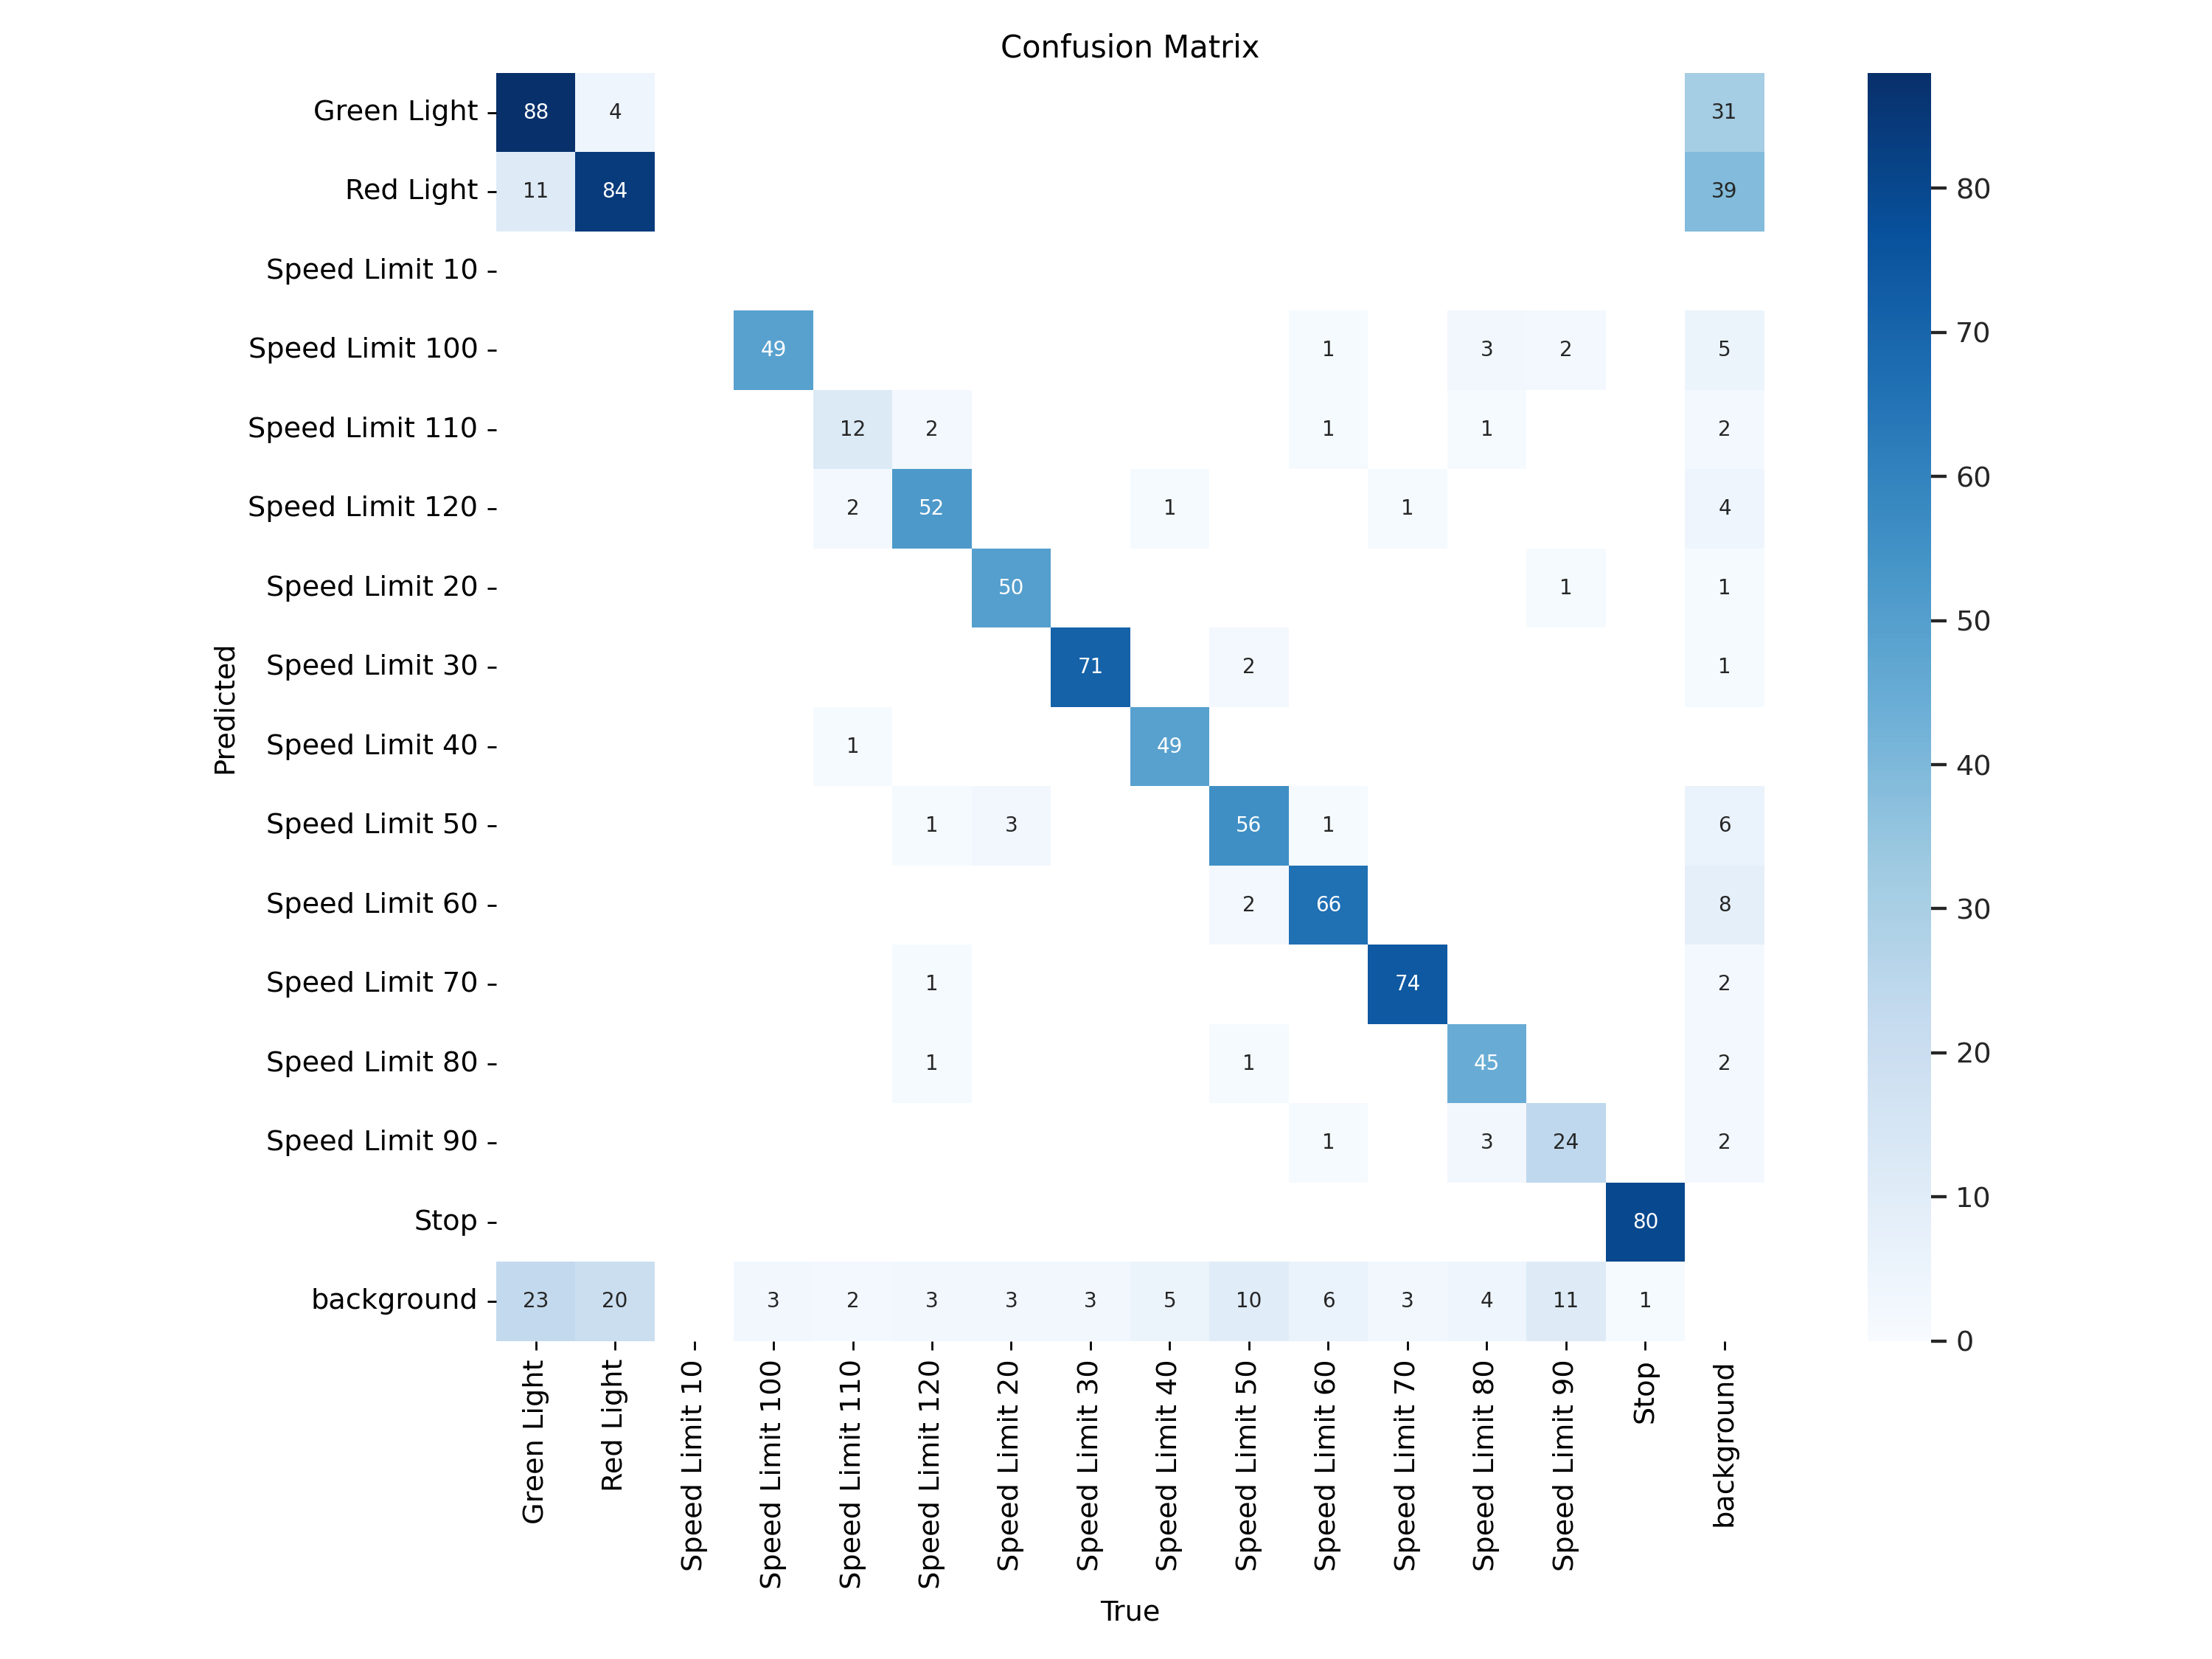

In [4]:
resultData = '/content/TrafficSignDetection/Self-Driving-Cars-6/runs/detect/train'

from IPython.display import Image, display

Image(filename=f'{resultData}/confusion_matrix.png', width=600)

In [5]:
import pandas as pd

df = pd.read_csv(f"{resultData}/results.csv")
df.head()


,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,71.193,0.85742,4.03864,1.21966,0.26994,0.40807,0.30181,0.24308,0.74564,1.93638,1.09854,0.000175,0.000175,0.000175
1,2,135.185,0.76121,2.95960,1.08573,0.48786,0.50917,0.47883,0.38977,0.73429,1.74796,1.08725,0.000315,0.000315,0.000315
2,3,198.958,0.73644,2.31727,1.05833,0.61593,0.59387,0.65536,0.55056,0.73692,1.30279,1.08721,0.000421,0.000421,0.000421
3,4,262.150,0.69809,1.80762,1.03273,0.78870,0.68584,0.76856,0.64153,0.72368,1.03901,1.07365,0.000370,0.000370,0.000370
4,5,325.737,0.67224,1.43556,1.00804,0.82659,0.72724,0.81462,0.68890,0.68099,0.86624,1.02874,0.000318,0.000318,0.000318


In [6]:
%pwd

'/content/TrafficSignDetection/Self-Driving-Cars-6'

In [7]:
%cd /content

/content


In [8]:
%pwd

'/content'

In [9]:
!mkdir ManualTestingData

In [12]:
weightPath = '/content/TrafficSignDetection/Self-Driving-Cars-6/runs/detect/train/weights/best.pt'

!yolo task=detect mode=predict model={weightPath} conf=0.25 source=/content/ManualTestingData/sp20.png

Ultralytics 8.3.32 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/ManualTestingData/sp20.png: 640x480 1 Speed Limit 120, 1 Speed Limit 20, 37.4ms
Speed: 3.8ms preprocess, 37.4ms inference, 138.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict
